# Downsizing Data

### It is hard to build models without teacher with many features(columns of data), for this case can use downsizing data, they will be compressed, into a smaller size features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Graph Config
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


## PCA

### Principal Component Analysis - one of the ways to downsize data

In [2]:
# Column 0 - room qty

# column 1 - house square

houses = np.array([
    [5, 1.6],
    [4, 1.4],
    [6, 1.9],
    [3, 1.1],
    [4, 1.25]
])

Text(0, 0.5, 'House_Sqr')

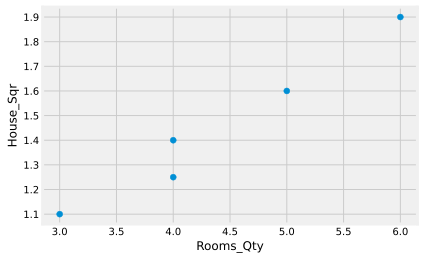

In [3]:
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Rooms_Qty')
plt.ylabel('House_Sqr')

### PCA in practice

In [4]:
# Display data

houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

In [5]:
# Find mean of each val

mean_value = np.mean(houses, axis=0)
mean_value

array([4.4 , 1.45])

In [6]:
# From each value  minus mean val

houses_centered = houses - mean_value
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

In [7]:
# Get Covarience Matrix

covarience_matrix = np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [8]:
# Check that covarience_matrix is correct

print(np.var(houses_centered[:, 0], ddof=1))
print(np.var(houses_centered[:, 1], ddof=1))

1.3
0.09749999999999998


### Use EIG( eigenvectors )

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(covarience_matrix)

In [10]:
eigenvalues

array([1.39445221, 0.00304779])

In [11]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

Because there is a big different between eigenvalues and eigenvalues[:, 0],
need centered_houses multiply by eigenvalues[:, 0]

In [12]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

### Compare results with sklearn

In [13]:
from sklearn.decomposition import PCA

In [14]:
# N_comp - Qty of components that we r looking for

pca = PCA(n_components=1)

In [15]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [16]:
pca.explained_variance_ratio_

array([0.99781911])

Results are close to 1, in this case result shows that less than 1 percent will be lost

### Use PCA on machine learning models

#### Use models (train & test) created with Titanic passengers

In [17]:
# Training Models

X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [18]:
# Testing Models

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 35.2 KB


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

In [22]:
# didn't specify qty of components(in this case all what is there)

pca = PCA(random_state=100)

In [23]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [24]:
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 1.72863109e-32, 1.01035833e-32])

In [25]:
# This result shows that will be lost about 9%

np.sum(pca.explained_variance_ratio_[:7])

0.9165877504406759

In [26]:
# Try to reduce qty of components

pca = PCA(n_components=7, random_state=100)

In [27]:
X_train_mc = pca.fit_transform(X_train_scaled)

In [28]:
X_valid_mc = pca.transform(X_valid_scaled)

### Create Log. Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train_mc, y_train)

LogisticRegression()

In [32]:
y_pred = lr.predict(X_valid_mc)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_valid, y_pred)

0.8026905829596412